In [57]:
import pandas as pd
import calendar
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import math

In [58]:
# load Data
cand_items = pd.read_csv('dressipi_recsys2022/candidate_items.csv', sep=',')
item_features = pd.read_csv('clustered_features.csv', sep=',')
train_purchases = pd.read_csv('dressipi_recsys2022/train_purchases.csv', sep=',')
train_sessions = pd.read_csv('dressipi_recsys2022/train_sessions.csv', sep=',')

In [59]:
# remove sessions that purchased items that are not included in candidate items
train_purchases = train_purchases[train_purchases.item_id.isin(cand_items.item_id)]
train_sessions = train_sessions[train_sessions.session_id.isin(train_purchases.session_id)]

In [60]:
train_purchases.shape,train_sessions.shape

((450153, 3), (2085385, 3))

In [61]:
# create a z_score on the purchase frequency of the items

purchases_frequency = train_purchases.groupby('item_id').count().reset_index().drop('date',axis=1)
purchases_frequency.columns = ['item_id','n_purchased']
purchases_frequency['z_score'] = (purchases_frequency['n_purchased'] - purchases_frequency['n_purchased'].mean())/purchases_frequency['n_purchased'].std()
purchases_frequency

,item_id,n_purchased,z_score
0,4,80,-0.056957
1,8,24,-0.316246
2,9,3,-0.413480
3,19,14,-0.362548
4,20,56,-0.168081
...,...,...,...
4872,28128,64,-0.131039
4873,28131,16,-0.353288
4874,28132,80,-0.056957
4875,28133,479,1.790481


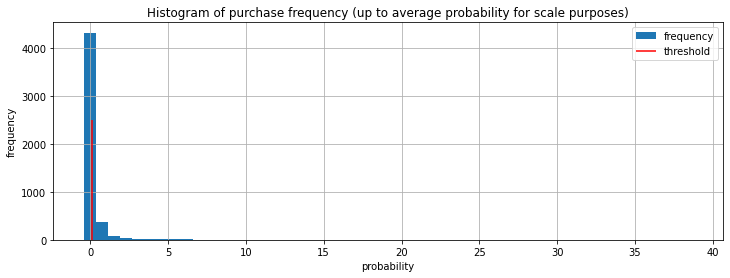

In [62]:
# plot distribution of item purchase popularity
threshold = 0.1

plt.figure(figsize=(12,4))
# purchases_frequency[purchases_frequency['z_score']<=0.005289]['z_score'].hist(bins=50,label='frequency')
purchases_frequency['z_score'].hist(bins=50,label='frequency')
plt.vlines(threshold,0,2500,color='red',label='threshold')
# plt.vlines(purchases_frequency['z_score'].median,0,17500,color='red',label='threshold')
plt.legend()
plt.title('Histogram of purchase frequency (up to average probability for scale purposes)')
plt.xlabel('probability')
plt.ylabel('frequency')
plt.show()

In [63]:
# exclude items with popularity less than the threshold and sessions that purchased those items
purchases_frequency = purchases_frequency[purchases_frequency['z_score']>=threshold]
train_purchases=train_purchases[train_purchases.item_id.isin(purchases_frequency['item_id'].unique())]
train_sessions = train_sessions[train_sessions.session_id.isin(train_purchases['session_id'].unique())]

In [64]:
# remaining items to reccomend from:
train_purchases.item_id.nunique()

930

In [65]:
# datasets shapes
len(train_purchases),len(train_sessions)

(289330, 1254814)

In [66]:
# store the cleanned sessions and purchases 

In [67]:
train_sessions.to_csv('train_sessions_cleanned.csv',index=False)
train_purchases.to_csv('train_purchases_cleanned.csv',index=False)